#Content

* [1. Introduction](#intro)
* [2. Initialisation](#ini)
* [3. Upload Data](#uploaddata)
* [4. Exploratory Data Analysis (EDA)](#eda)
* [5. Data Wrangling](#datawrangling)
* [6  Examination of Class Balance](#exam)
* [6.1 Unbalanced Model](#unbalanced)
* [6.2 Balanced Model](#balanced)
* [6.2.1 Searching the best model (Balance 1)](#balanced1)
* [6.2.2 Searching the best model (Balance 2)](#balanced2)
* [6.2.3 Searching the best model (Balance 3)](#balanced3)
* [7. AUC-ROC Metric](#auc)
* [8. Conclusions](#end)

# 1.Introduction <a id='intro'></a>

This project focuses on predicting whether a client of Beta Bank will leave the institution or not. To achieve this, we will use customer behavioral data from the bank’s database and evaluate different predictive models to determine which provides the most accurate results

# 2.Initialisation <a id='ini'></a>

In [37]:
# Loading libraries
from scipy import stats as st
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
from sklearn.utils import resample
from sklearn.metrics import roc_curve, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd
import re

# 3.Upload Data <a id='uploaddata'></a>

In [4]:
churn_base = pd.read_csv('Churn.csv')


# 4.Exploratory Data Analysis (EDA) <a id='eda'></a>

**Glossary**

- RowNumber: data string index
- CustomerId: unique customer identifier
- Surname: surname
- CreditScore: credit score
- Geography: country of residence
- Gender: gender
- Age: age
- Tenure: period during which a customer's fixed-term deposit has matured (years)
- Balance: account balance
- NumOfProducts: number of banking products used by the customer
- HasCrCard: customer has a credit card (1 - yes; 0 - no)
- IsActiveMember: customer activity (1 - yes; 0 - no)
- EstimatedSalary: estimated salary


In [5]:
churn_base

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1


In [6]:
churn_base.info() #Verifying dataset overall information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [7]:
churn_base.describe() #Using describe() to see anomalies in the data

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [8]:
#Checking duplicate data
duplicados = churn_base.duplicated()
cantidad_duplicados = duplicados.sum()
cantidad_duplicados # Finally, we check the number of duplicate rows in 'trips_base'


np.int64(0)

With the above information, we can conclude the following:

- There are a total of 10,000 rows.
- The “tenure” variable has missing values, which require treatment.
- The data is monthly, and analysing the minimum and maximum amounts for each does not reveal any anomalous values.
- The data types are correct for each variable (float, object, and int).
- It is recommended that column names be in lowercase.
- There is no data duplication.

Next, we continue to delve deeper into the data and analysis to see if any modifications are required.

In [9]:
churn_base['Geography'].sort_values(ascending=True).unique()

array(['France', 'Germany', 'Spain'], dtype=object)

In [10]:
churn_base['Gender'].sort_values(ascending=True).unique()

array(['Female', 'Male'], dtype=object)

In [11]:
churn_base['Tenure'].sort_values(ascending=True).unique()

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., nan])

In [12]:
churn_base['IsActiveMember'].sort_values(ascending=True).unique()

array([0, 1])

In [13]:
churn_base['HasCrCard'].sort_values(ascending=True).unique()

array([0, 1])

EDA last conclusions:

We check the variables one by one that are most likely to have anomalous data and see that the range of values is feasible and that there are no problems with data standardisation.

# 5.Data Wrangling <a id='datawrangling'></a>

In [14]:
#We correct column texts in lowercase
def to_snake_case(name):
    s1 = re.sub('(.)([A-Z][a-z]+)', r'\1_\2', name)
    return re.sub('([a-z0-9])([A-Z])', r'\1_\2', s1).lower()

In [15]:
churn_base.columns = [to_snake_case(col) for col in churn_base.columns]


**Missing Values**

In [16]:
#Verifying the % of 'tenure' missing values
prop_null = (churn_base['tenure'].isna().sum() / churn_base['tenure'].count())*100
prop_null

np.float64(9.99890001099989)

There is 9.998% of missing values in the "tenure" column, which means the data could be replaced using the Simple Imputation method, i.e., filling the missing values with either the median or the mean.

Next, we will verify whether it is more appropriate to use the mean or median in relation to the "age" column, since it is more likely that older clients have maintained a relationship with the service for a longer period than younger clients. However, we will first check whether this variable shows a pattern in its missing values when compared with the "age" column.

In [18]:
missing_data = churn_base[churn_base['tenure'].isnull()]
not_missing_data = churn_base[churn_base['tenure'].notnull()]
number_missing_data = missing_data['age'].value_counts(normalize = True)
number_not_missing_data = not_missing_data['age'].value_counts(normalize =True)

tabla_contingencia1 = pd.DataFrame({'Not Missing Data': number_not_missing_data, 'Missing Data': number_missing_data})
tabla_contingencia1 = tabla_contingencia1.sort_values(by=['Missing Data', 'Not Missing Data'], ascending=[False, False])

tabla_contingencia1 # Let's investigate the missing values for another potential causal feature (“age”)

,Not Missing Data,Missing Data
age,,
36,0.04411,0.060506
38,0.04664,0.058306
40,0.04213,0.053905
31,0.03949,0.049505
32,0.04114,0.048405
...,...,...
84,0.00022,NaN
82,0.00011,NaN
83,0.00011,NaN


We can see that the missing values in the "age" column do not show a clear pattern in relation to the main candidate, "tenure", to determine whether there is any explanation or symmetrical distribution in its missing values. In other words, there is no clear trend in the distribution of missing values across any category of "age" (the maximum value is 0.06, which is below the general threshold of 0.7 or 0.8).

This implies that there is no need to investigate further for a possible correlation explaining the missing values, since statistically they can be considered random. Therefore, the missing values in "tenure" can be replaced with the median or mean, grouped by the "age" variable.

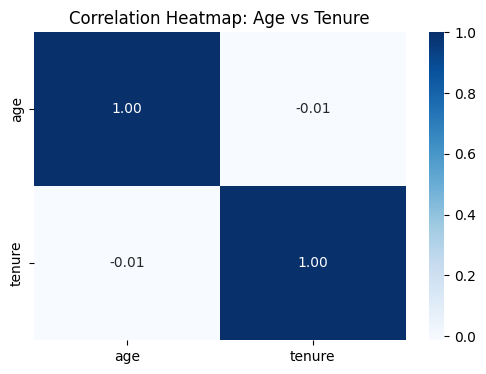

In [38]:
# Pearson correlation
plt.figure(figsize=(6,4))
sns.heatmap(corr_value, annot=True, cmap='Blues', fmt=".2f", cbar=True)
plt.title("Correlation Heatmap: Age vs Tenure")
plt.show()

Moreover, we can see that there is no correlation between tenure and age.

In [22]:
#We have added a function to calculate averages and medians for the purpose of completing missing values.
def calcular_estadistica_por_grupo(data, columna, columna2, estadistica = True, redondear = True):
    if estadistica == True:
        resultado = churn_base.groupby(columna2)[columna].mean()
        if redondear:
                resultado = round(resultado)
    else:
        resultado = churn_base.groupby(columna2)[columna].median()

    resultado = resultado.sort_values(ascending=False)
    return resultado

In [23]:
#Calculating the 'tenure' mean grouped by plataform
calcular_estadistica_por_grupo(churn_base.dropna(),'tenure','age',True,True)

,tenure
age,
88,10.0
85,10.0
84,8.0
76,7.0
22,6.0
...,...
75,4.0
81,4.0
78,3.0


We see that the amount of aged data is not large and the mean and median are quite similar, so the deviation is low and that implies using the mean as the best value to replace the missing values.

In [25]:
for age, media in calcular_estadistica_por_grupo(churn_base, 'tenure', 'age',True, True).items():  #Create a function to replace missing values.
    churn_base.loc[(churn_base['age'] == age) & (churn_base['tenure'].isnull()), 'tenure'] = media #Replace missing values (filling in with the most representative variable: age)

In [26]:
churn_base.info() #Checking there is no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   row_number        10000 non-null  int64  
 1   customer_id       10000 non-null  int64  
 2   surname           10000 non-null  object 
 3   credit_score      10000 non-null  int64  
 4   geography         10000 non-null  object 
 5   gender            10000 non-null  object 
 6   age               10000 non-null  int64  
 7   tenure            10000 non-null  float64
 8   balance           10000 non-null  float64
 9   num_of_products   10000 non-null  int64  
 10  has_cr_card       10000 non-null  int64  
 11  is_active_member  10000 non-null  int64  
 12  estimated_salary  10000 non-null  float64
 13  exited            10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


# 6. Examination of Class Balance <a id='exam'></a>

In [27]:
# First, we convert the categorical variables in the dataset into numerical representations using one-hot encoding.
churn_base = pd.get_dummies(churn_base, columns=['surname','geography', 'gender'])

In [28]:
churn_base.head() #Verifying the changes

,row_number,customer_id,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,...,surname_Zubarev,surname_Zubareva,surname_Zuev,surname_Zuyev,surname_Zuyeva,geography_France,geography_Germany,geography_Spain,gender_Female,gender_Male
0,1,15634602,619,42,2.0,0.00,1,1,1,101348.88,...,False,False,False,False,False,True,False,False,True,False
1,2,15647311,608,41,1.0,83807.86,1,0,1,112542.58,...,False,False,False,False,False,False,False,True,True,False
2,3,15619304,502,42,8.0,159660.80,3,1,0,113931.57,...,False,False,False,False,False,True,False,False,True,False
3,4,15701354,699,39,1.0,0.00,2,0,0,93826.63,...,False,False,False,False,False,True,False,False,True,False
4,5,15737888,850,43,2.0,125510.82,1,1,1,79084.10,...,False,False,False,False,False,False,False,True,True,False


In [32]:
# Examinamos el equilibrio de clases
clases_equilibradas = churn_base['exited'].value_counts(normalize=True)
clases_equilibradas

,proportion
exited,
0,0.7963
1,0.2037


This means that approximately 79.63% of the observations in the dataset belong to class 0 (customers who have not left), while approximately 20.37% belong to class 1 (customers who have left).

In this case, there is a significant imbalance, since class 0 (customers who have not left) is much more common than class 1 (customers who have left). We will take this imbalance into account when training and evaluating the models, as it may affect the model’s ability to correctly learn patterns in the minority class and could bias the predictions toward the majority class.

## 6.1 Unbalanced Model <a id='unbalance'></a>

In [33]:
# We divide the dataset into features (x) and labels (y)
x = churn_base.drop(columns=['exited'])  # features
y = churn_base['exited']  # labels

In [34]:
# We divide the data into training, validation, and test sets.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=12345)

In [35]:
# We train the model using, in this case, 'RandomForestClassifier'
model = RandomForestClassifier(random_state=12345)
model.fit(x_train, y_train)

RandomForestClassifier(random_state=12345)

In [36]:
# Making predictions in the test set
y_pred = model.predict(x_test)

# Model assessment
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.98      0.90      1573
           1       0.82      0.30      0.44       427

    accuracy                           0.84      2000
   macro avg       0.83      0.64      0.67      2000
weighted avg       0.83      0.84      0.80      2000



Preliminary analysis of the report for this case (first model, with imbalance):

- In this report, the precision for class 0 is 84%, which means that 84% of class 0 predictions were correct, and for class 1 it is 82%, which means that 82% of class 1 predictions were correct.

- The recall for class 0 is 98%, which means that 98% of class 0 instances were correctly identified, and for class 1 it is 30%, which means that only 30% of class 1 instances were correctly identified.

- The F1-score, that is, the harmonic mean of precision and recall, provides a single measure that combines both metrics. It is useful when classes are imbalanced, as it considers both false positives and false negatives. In this case, the F1-score for class 0 is 90%, and for class 1 it is 44%.

- “Support” indicates the number of instances of each class in the test dataset.

- Overall accuracy is the proportion of correct predictions out of the total predictions made by the model. In this model, the overall accuracy is 84%, which means that 84% of all predictions were correct.

Preliminary conclusion of this model:

- Regarding the precision for both classes, it is relatively high, indicating that the model does a good job predicting the correct class. On the other hand, the recall for class 1 (customers who have left) is quite low compared to class 0 (customers who have not left). This means that the model has difficulty correctly identifying positive cases in the dataset due to the class imbalance.

- The F1-score for class 1 is very low (44%), which indicates that the model struggles to balance precision and recall for the minority class because of the class imbalance.

- The model correctly classifies 84% of all instances in the test dataset (accuracy); however, due to the class imbalance, accuracy alone can be misleading.

## 6.2 Balanced Model <a id='balanced'></a>

### 6.2.1 Searching the best model (Balance 1) <a id='balanced1'></a>

**Splitting the dataset**

In [30]:
# We divide the dataset into features (w) and labels (z)
w = churn_base.drop(columns=['exited'])  # features
z = churn_base['exited']  # labels

In [31]:
# We divide the data into training, validation, and test sets.
w_train_val, w_test, z_train_val, z_test = train_test_split(w, z, test_size=0.2, random_state=12345)
w_train, w_val, z_train, z_val = train_test_split(w_train_val, z_train_val, test_size=0.5, random_state=42)  # 80% train, 20% validation, 20% test


**Class Balance (Simple Function)**

In [39]:
# Shuffling the data
w_train_shuffled, z_train_shuffled = shuffle(w_train, z_train, random_state=12345)

# Oversampling of class 1 in the training set using upsample
w_train_majority = w_train_shuffled[z_train_shuffled == 0]
w_train_minority = w_train_shuffled[z_train_shuffled == 1]

w_train_minority_upsampled = resample(w_train_minority, replace=True, n_samples=len(w_train_majority), random_state=42)
w_train_upsampled = pd.concat([w_train_majority, w_train_minority_upsampled])
z_train_upsampled = pd.Series([0] * len(w_train_majority) + [1] * len(w_train_minority_upsampled))


**Best Model Iteration**

In [40]:
# Defining candidate models
models = {
    'RandomForest': RandomForestClassifier(random_state=12345),
    'DecisionTree': DecisionTreeClassifier(random_state=12345),
    'LogisticRegression': LogisticRegression(random_state=12345)
}

# We define hyperparameters with ranges for iteration of “n_estimators” and “max_depth” as applicable to each model.
param_grid = {
    'RandomForest': {'n_estimators': range(10, 101, 10), 'max_depth': range(1, 21)},
    'DecisionTree': {'max_depth': range(1, 21)},
    'LogisticRegression': {}  # There are no hyperparameters for LogisticRegression
}

# Defining parameters for train interation and model adjustment
best_model = None
best_f1_score = 0

for name, model in models.items():
    params = param_grid[name]
    best_params = None
    best_model_instance = None
    best_f1_score_instance = 0

    for n_estimators in params.get('n_estimators', [None]):
        for max_depth in params.get('max_depth', [None]):
            if name == 'RandomForest':
                model_instance = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=12345)
            elif name == 'DecisionTree':
                model_instance = DecisionTreeClassifier(max_depth=max_depth, random_state=12345)

            else:
                model_instance = LogisticRegression(random_state=12345)

            model_instance.fit(w_train_upsampled, z_train_upsampled)  #Training balanced data


            z_pred_val = model_instance.predict(w_val)
            f1 = f1_score(z_val, z_pred_val)

            if f1 > best_f1_score_instance:
                best_f1_score_instance = f1
                best_model_instance = model_instance
                best_params = {'n_estimators': n_estimators, 'max_depth': max_depth}


    print(f"Best F1-score for {name}: {best_f1_score_instance} with hyperparameters: {best_params}")

    if best_f1_score_instance > best_f1_score:
        best_model = best_model_instance
        best_f1_score = best_f1_score_instance


Best F1-score for RandomForest: 0.5629389519178822 with hyperparameters: {'n_estimators': 60, 'max_depth': 20}
Best F1-score for DecisionTree: 0.5694508537148131 with hyperparameters: {'n_estimators': None, 'max_depth': 6}
Best F1-score for LogisticRegression: 0.3523809523809524 with hyperparameters: {'n_estimators': None, 'max_depth': None}


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In this case, the best model in the validation set was:  'DecisionTree', with 'max_depth: 6'

In [ ]:
# We evaluate the best model on the test set
z_pred_test = best_model.predict(w_test)
# We evaluate F1 on the test set
f1_test = f1_score(z_test, z_pred_test)
print("Best model (based on F1-score on validation set) on test set:")
print(classification_report(z_test, z_pred_test))
print(f'F1 on test set: {f1_test}')

### 6.2.2 Searching the best model (Balance 2) <a id='balanced2'></a>

**Splitting the dataset**

In [41]:
# We divide the dataset into features (w) and labels (z) because this is another class balance
c = churn_base.drop(columns=['exited'])  # features
d = churn_base['exited']  # labels

In [42]:
# We divide the data into training, validation, and test sets.
c_train_val, c_test, d_train_val, d_test = train_test_split(c, d, test_size=0.2, random_state=12345)
c_train, c_val, d_train, d_val = train_test_split(c_train_val, d_train_val, test_size=0.5, random_state=12345)  # 80% train, 20% validation, 20% test


**Class Balance (Replicate minority class)**

In [43]:
# Replicate instances of the minority class in the training set
c_train_balanced = pd.concat([c_train[y_train == 0], c_train[y_train == 1].sample(n=sum(d_train == 0), replace=True, random_state=12345)])
d_train_balanced = pd.concat([d_train[y_train == 0], d_train[y_train == 1].sample(n=sum(d_train == 0), replace=True, random_state=12345)])


/tmp/ipython-input-2379058901.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c_train_balanced = pd.concat([c_train[y_train == 0], c_train[y_train == 1].sample(n=sum(d_train == 0), replace=True, random_state=12345)])
/tmp/ipython-input-2379058901.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c_train_balanced = pd.concat([c_train[y_train == 0], c_train[y_train == 1].sample(n=sum(d_train == 0), replace=True, random_state=12345)])


**Best Model Iteration**

In [44]:
# Defining the models to evaluate
models = {
    'RandomForest': RandomForestClassifier(random_state=12345),
    'DecisionTree': DecisionTreeClassifier(random_state=12345),
    'LogisticRegression': LogisticRegression(random_state=12345)
}

# We define hyperparameters with ranges for iteration
param_grid = {
    'RandomForest': {'n_estimators': range(10, 101, 10), 'max_depth': range(1, 21)},
    'DecisionTree': {'max_depth': range(1, 21)},
    'LogisticRegression': {}  # No hay hiperparámetros para LogisticRegression
}

# Training and fitting models
best_model = None
best_f1_score = 0

for name, model in models.items():
    params = param_grid[name]
    best_params = None
    best_model_instance = None
    best_f1_score_instance = 0

    for n_estimators in params.get('n_estimators', [None]):
        for max_depth in params.get('max_depth', [None]):
            if name == 'RandomForest':
                model_instance = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=12345)
            elif name == 'DecisionTree':
                model_instance = DecisionTreeClassifier(max_depth=max_depth, random_state=12345)
            else:
                model_instance = LogisticRegression(random_state=12345)

            model_instance.fit(c_train_balanced, d_train_balanced)  # Training with balanced dataset

            d_pred_val = model_instance.predict(c_val)
            f1 = f1_score(d_val, d_pred_val)

            if f1 > best_f1_score_instance:
                best_f1_score_instance = f1
                best_model_instance = model_instance
                best_params = {'n_estimators': n_estimators, 'max_depth': max_depth}

    print(f"The best F1-score is for {name}: {best_f1_score_instance} with hyperparameters: {best_params}")

    if best_f1_score_instance > best_f1_score:
        best_model = best_model_instance
        best_f1_score = best_f1_score_instance


The best F1-score is for RandomForest: 0.5659309564233164 with hyperparameters: {'n_estimators': 50, 'max_depth': 20}
The best F1-score is for DecisionTree: 0.552344251766217 with hyperparameters: {'n_estimators': None, 'max_depth': 14}
The best F1-score is for LogisticRegression: 0.33910279053338044 with hyperparameters: {'n_estimators': None, 'max_depth': None}


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In this case, the best model in the validation set was: 'RandomForest', with 'n_estimators: 50' and max_depth: 20'

In [45]:
# We evaluate the best model on the test set
d_pred_test = best_model.predict(c_test)
# We evaluate F1 on the test set
f1_test = f1_score(d_test, d_pred_test)
print("Best model (based on F1-score on validation set) on test set:")
print(classification_report(d_test, d_pred_test))
print(f'F1 in the test set: {f1_test}')

Best model (based on F1-score on validation set) on test set:
              precision    recall  f1-score   support

           0       0.90      0.84      0.87      1573
           1       0.52      0.64      0.58       427

    accuracy                           0.80      2000
   macro avg       0.71      0.74      0.72      2000
weighted avg       0.82      0.80      0.81      2000

F1 in the test set: 0.5753424657534246


### 6.2.3 Searching the best model (Balance 3) <a id='balanced3'></a>

**Splitting the dataset**

In [46]:
# We divide the dataset into features (w) and labels (z) because this is another class balance
a = churn_base.drop(columns=['exited'])  # features
b = churn_base['exited']  # labels

In [47]:
# We divide the data into training, validation, and test sets.
a_train_val, a_test, b_train_val, b_test = train_test_split(a, b, test_size=0.2, random_state=12345)
a_train, a_val, b_train, b_val = train_test_split(a_train_val, b_train_val, test_size=0.5, random_state=12345)  # 80% train, 20% validation, 20% test


**Best Model Iteration**

In [48]:

# Defining the models to evaluate
models = {
    'RandomForest': RandomForestClassifier(class_weight='balanced', random_state=12345),
    'DecisionTree': DecisionTreeClassifier(class_weight='balanced', random_state=12345),
    'LogisticRegression': LogisticRegression(class_weight='balanced', random_state=12345)
}

# Defining hyperparameters for iteration
param_grid = {
    'RandomForest': {'n_estimators': range(10, 101, 10), 'max_depth': range(1, 21)},
    'DecisionTree': {'max_depth': range(1, 21)},
    'LogisticRegression': {}  # There are not hyperparameters in LogisticRegression
}

# Training and fitting models
best_model = None
best_f1_score = 0

for name, model in models.items():
    params = param_grid[name]
    best_params = None
    best_model_instance = None
    best_f1_score_instance = 0

    #Iteration includes the hyperparameter 'class_weight = balanced'
    for n_estimators in params.get('n_estimators', [None]):
        for max_depth in params.get('max_depth', [None]):
            if name == 'RandomForest':
                model_instance = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, class_weight='balanced', random_state=12345)
            elif name == 'DecisionTree':
                model_instance = DecisionTreeClassifier(max_depth=max_depth, class_weight='balanced', random_state=12345)
            else:
                model_instance = LogisticRegression(class_weight='balanced', random_state=12345)

            model_instance.fit(a_train, b_train)  # Training the weight of balanced classes

            b_pred_val = model_instance.predict(a_val)
            f1 = f1_score(b_val, b_pred_val)

            if f1 > best_f1_score_instance:
                best_f1_score_instance = f1
                best_model_instance = model_instance
                best_params = {'n_estimators': n_estimators, 'max_depth': max_depth}

    print(f"The best F1-score is {name}: {best_f1_score_instance} with hyperparameters: {best_params}")

    if best_f1_score_instance > best_f1_score:
        best_model = best_model_instance
        best_f1_score = best_f1_score_instance

The best F1-score is RandomForest: 0.5531233315536572 with hyperparameters: {'n_estimators': 100, 'max_depth': 17}
The best F1-score is DecisionTree: 0.5570291777188329 with hyperparameters: {'n_estimators': None, 'max_depth': 7}
The best F1-score is LogisticRegression: 0.33772711079444245 with hyperparameters: {'n_estimators': None, 'max_depth': None}


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Here I created an extra model (3rd) for comparison with the previous one.
In this case, the best model in the validation set was: “DecisionTree”, with “max_depth: 7”.

In [49]:
# We evaluate the best model on the test set
b_pred_test = best_model.predict(a_test)
# We evaluate F1 on the test set
f1_test = f1_score(b_test, b_pred_test)
print("Best model (based on F1-score on validation set) on test set:")
print(classification_report(b_test, b_pred_test))
print(f'F1 in the test set: {f1_test}')

Best model (based on F1-score on validation set) on test set:
              precision    recall  f1-score   support

           0       0.90      0.84      0.87      1573
           1       0.52      0.66      0.58       427

    accuracy                           0.80      2000
   macro avg       0.71      0.75      0.73      2000
weighted avg       0.82      0.80      0.81      2000

F1 in the test set: 0.5832471561530507


**Preliminary Conclusion (3 balanced models)**

After iterating through models and hyperparameters using different class balancing methods, we can conclude the following:

- The best class balance (F1-score) on the test set for the best model was 0.58324.

- The best model achieving the highest F1 was a RandomForest with hyperparameters: 'n_estimators': 50 and 'max_depth': 20.

- The highest F1 on the test set was achieved using the minority class replication method for balancing classes.

- The recall for class 1 is 66%, indicating that the model correctly identified 66% of all customers who actually left.

- The precision for class 1 is 52%, meaning that of all customers predicted by the model as “customers who left,” 52% actually left.

- The best performance for the minority class was a precision of 0.52, recall of 0.66, and overall accuracy of 0.8.

In general, the model shows acceptable but not excellent performance in predicting customers who left. Although it has reasonable precision and recall for class 1, the F1-score could still be improved. This suggests there is room for improvement in the model, and different approaches could be explored, such as adjusting classification thresholds, testing different classification algorithms, or using advanced feature selection techniques to enhance model performance.

# 7. AUC-ROC Metric <a id='auc'></a>

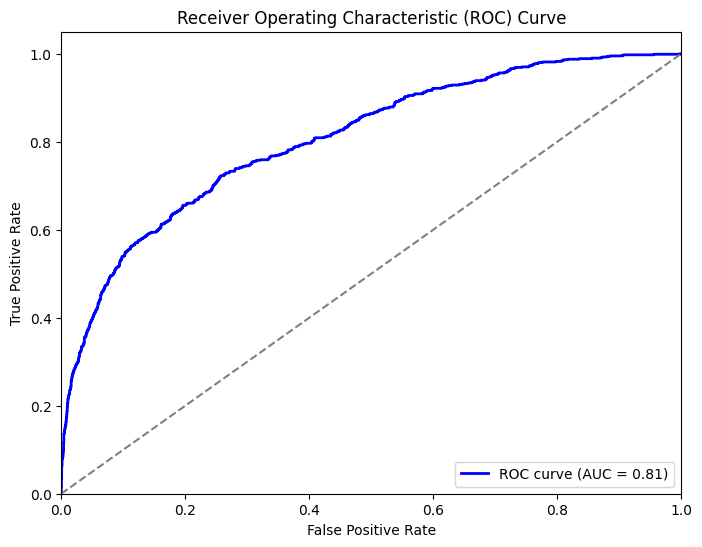

Valor AUC-ROC: 0.806470030623646


In [50]:
# We create and train the RandomForest model with the best hyperparameters identified above.
model = RandomForestClassifier(n_estimators=50, max_depth=20, random_state=12345)
model.fit(c_test, d_test)

# Predicting class 1 probabilities for the validation set
d_pred_proba = model.predict_proba(c_val)[:, 1]

# Calculating the ROC curve and the AUC-ROC value
fpr, tpr, thresholds = roc_curve(d_val, d_pred_proba)
roc_auc = roc_auc_score(d_val, d_pred_proba)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Printing the AUC-ROC value
print("Valor AUC-ROC:", roc_auc)

# 8. Conclusions <a id='end'></a>

From the analysis conducted in this report, we can conclude the following:

1) The imbalanced model developed in point 7, that is, without class balancing, obtained an F1-score of 0.44, which means the model struggles to balance precision and recall for the minority class (class 1). Therefore, the performance for class 1 (customers who have left) is low.

2) In the balanced model, iterations were performed across the models Decision Tree, Random Forest, and Logistic Regression, as well as different hyperparameter settings. Additionally, two different class balancing methods were applied: simple function and minority class replication. The best model obtained was the Random Forest with hyperparameters 'n_estimators': 50 and 'max_depth': 20, using the minority class replication method for balancing.

3) Since the AUC-ROC value is relatively high (0.81), but the F1-score for class 1 in the test set is 0.58, we can conclude the following:

  The model has good overall ability to distinguish between positive and negative classes, as indicated by the high AUC-ROC value. However, the performance for class 1 (customers who have left) can be improved by adjusting the classification threshold, as the F1-score for this class is moderate but not excellent.

  This also suggests that the model may be biased toward the majority class or there may be specific challenges in classifying the class of interest.

4) Finally, for Beta Bank, this is a proposed model that works but could be further improved to better predict customers who are likely to leave the bank. The proposal should be reviewed by the bank’s senior management to determine whether adjustments or additional resources are required to enhance the model.